<a href="https://colab.research.google.com/github/Incredible-Dan/DataScience/blob/main/Email_Spam_Detection_Project1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### Import Important Libraries


In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier




#### Data Cleaning & Preparation



In [10]:
# Loading the Dataset

email_df = pd.read_excel('/content/Email spam.xlsx')
email_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#### Removing Unwanted Columns

In [11]:
email_df = email_df[['v1', 'v2']]  # Keep only relevant columns

In [12]:
# CHECKING THE DATA

In [13]:
email_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
email_df.describe

<bound method NDFrame.describe of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will �_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [15]:
email_df.shape

(5572, 2)

#### Renaming the Columns

In [16]:
email_df.columns = ['label', 'message']  # Rename columns

In [17]:
# CONFIRMING THE COLUMN NAME CHANGE

In [18]:
email_df.columns

Index(['label', 'message'], dtype='object')

#### Data Cleaning

In [19]:
# Clean data
email_df['label'] = email_df['label'].map({'ham': 0, 'spam': 1})  # Convert to binary
email_df.drop_duplicates(inplace=True)
email_df.dropna(inplace=True)
email_df

<ipython-input-19-55caa9446879>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_df['label'] = email_df['label'].map({'ham': 0, 'spam': 1})  # Convert to binary
<ipython-input-19-55caa9446879>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_df.drop_duplicates(inplace=True)
<ipython-input-19-55caa9446879>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_df.dropn

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


####  Adding text length feature

In [20]:
# Add text length feature

# Ensure all values in 'message' column are strings before applying len()
email_df['msg_length'] = email_df['message'].astype(str).apply(len)

# Count digits while handling non-string values safely

email_df['num_digits'] = email_df['message'].astype(str).apply(lambda x: sum(c.isdigit() for c in x))

# Verify the updated DataFrame

print(email_df[['message', 'msg_length', 'num_digits']].head())


<ipython-input-20-5bd841e42bbf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_df['msg_length'] = email_df['message'].astype(str).apply(len)


                                             message  msg_length  num_digits
0  Go until jurong point, crazy.. Available only ...         111           0
1                      Ok lar... Joking wif u oni...          29           0
2  Free entry in 2 a wkly comp to win FA Cup fina...         155          25
3  U dun say so early hor... U c already then say...          49           0
4  Nah I don't think he goes to usf, he lives aro...          61           0


<ipython-input-20-5bd841e42bbf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_df['num_digits'] = email_df['message'].astype(str).apply(lambda x: sum(c.isdigit() for c in x))



### Exploratory Data Analysis (EDA)


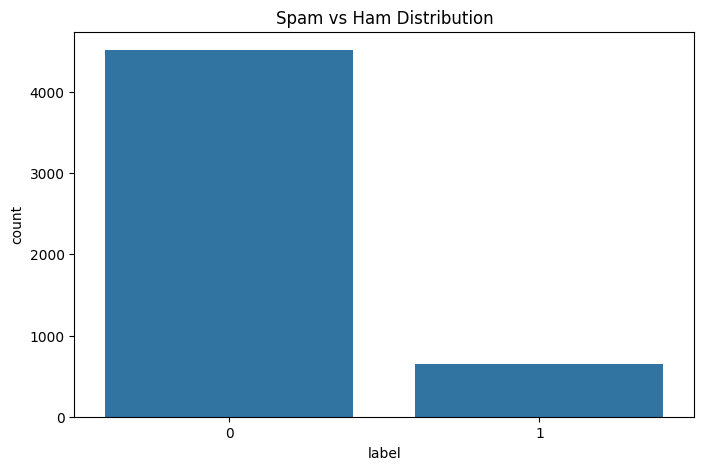

In [21]:
# Class distribution
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=email_df)
plt.title('Spam vs Ham Distribution')
plt.show()

#### Message Length Distribution Analysis

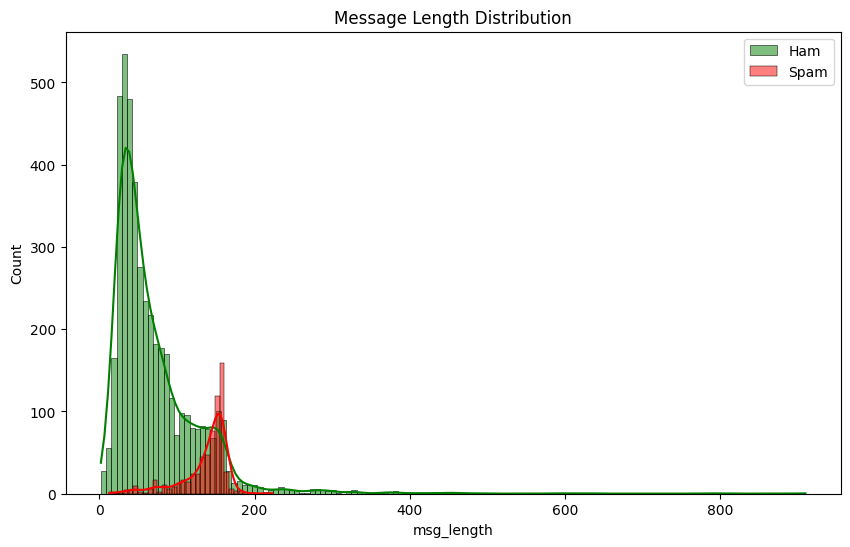

In [22]:
# Text length analysis
plt.figure(figsize=(10,6))
sns.histplot(email_df[email_df['label']==0]['msg_length'], color='green', label='Ham', kde=True)
sns.histplot(email_df[email_df['label']==1]['msg_length'], color='red', label='Spam', kde=True)
plt.title('Message Length Distribution')
plt.legend()
plt.show()

### Message Length Distribution shows that:
Ham or Normal Mails had longer message length in the Dataset

### Distribution of Top Spam Word

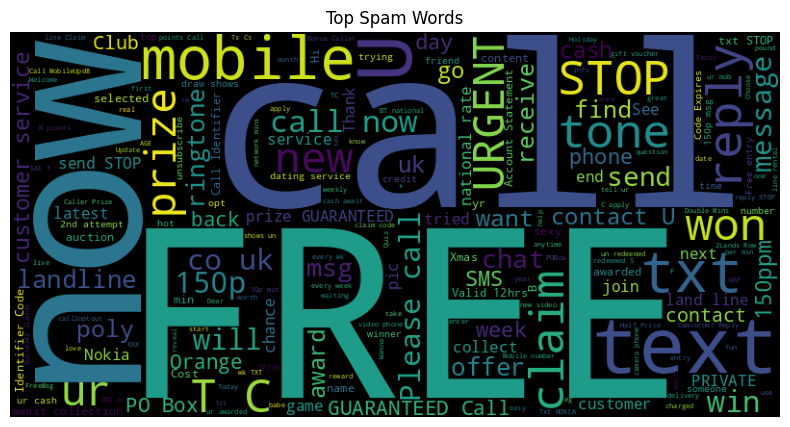

In [23]:
# Top spam words
from wordcloud import WordCloud

spam_words = ' '.join(email_df[email_df['label']==1]['message'])
wordcloud = WordCloud(width=800, height=400).generate(spam_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('Top Spam Words')
plt.axis('off')
plt.show()


### Distribution of TOP HAM or NOT SPAM WORD

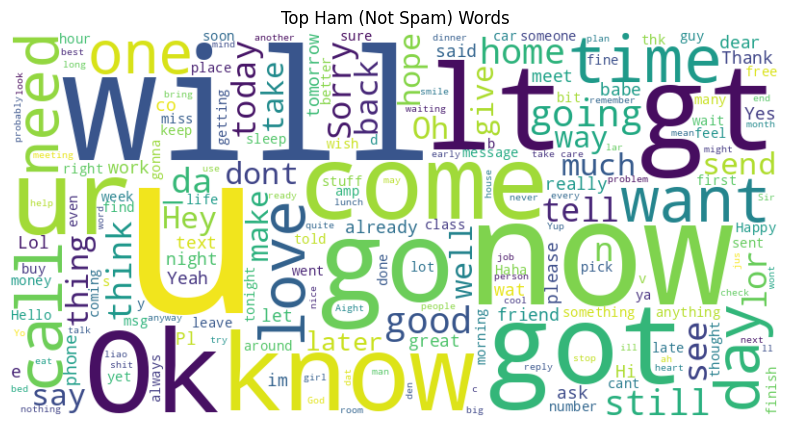

In [24]:
# Convert messages to string before joining
ham_words = ' '.join(email_df[email_df['label'] == 0]['message'].astype(str))

# Generate the word cloud
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

# Display the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Top Ham (Not Spam) Words')
plt.axis('off')
plt.show()


### Most Frequent Words Analysis


<ipython-input-25-dc9f2adb4576>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_df['message'] = email_df['message'].fillna('')  # Handle missing values
<ipython-input-25-dc9f2adb4576>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_df['message'] = email_df['message'].astype(str)  # Convert to strings
<ipython-input-25-dc9f2adb4576>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False`

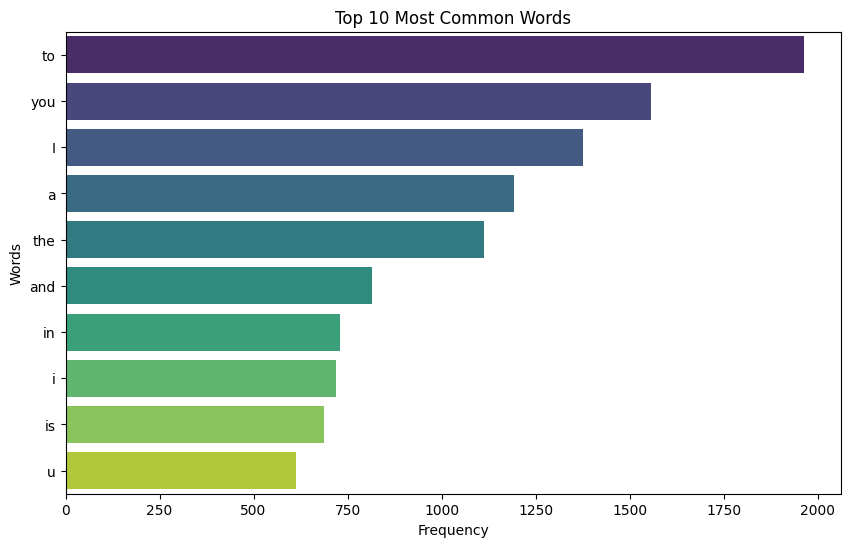

In [25]:

from collections import Counter

# --- Add these lines FIRST ---
email_df['message'] = email_df['message'].fillna('')  # Handle missing values
email_df['message'] = email_df['message'].astype(str)  # Convert to strings
# -----------------------------

all_words = ' '.join(email_df['message']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)

# Bar chart
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Top 10 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


#### Model Training & Evaluation


#### Text vectorization

In [26]:

# Convert all messages to string to avoid the 'int' object error

email_df['message'] = email_df['message'].astype(str)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the message column
X = tfidf.fit_transform(email_df['message'])

# Define target variable
y = email_df['label']


<ipython-input-26-2ff9bba9380e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_df['message'] = email_df['message'].astype(str)


#### Splitting the Dataset into Train-test split

In [27]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Model Building

In [28]:
#model =MultinomialNB()
#model.fit(X_train,y_train)

In [29]:
# Model configuration
models = {
    'Naive Bayes': (MultinomialNB(), {'alpha': [0.1, 1.0]}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100]}),
    'Gradient Boosting': (GradientBoostingClassifier(), {'n_estimators': [50, 100]}),
}


#### Model training and evaluation

In [30]:

results = []
for name, (model, params) in models.items():
    # Hyperparameter tuning
    grid = GridSearchCV(model, params, cv=5, scoring='precision')
    grid.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

### Best Model Prediction

In [31]:
# Best model

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


In [32]:
print(best_model)

GradientBoostingClassifier()


#### Storing the Rsults

In [33]:
 # Store results
results.append({
    'Model': name,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Best Params': grid.best_params_
})

#### Displaying the Results

In [34]:
print(f"Model: {name}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}") # showing to 4 decimal places
print(f"Precision: {precision_score(y_test, y_pred):.4f}") # showing to 4 decimal places
print(f"Best Params: {grid.best_params_}")


Model: Gradient Boosting
Accuracy: 0.9652
Precision: 0.9444
Best Params: {'n_estimators': 100}


#### comparison the Results


In [35]:
# Results comparison

results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df.sort_values(by='Precision', ascending=False))


Model Performance Comparison:
               Model  Accuracy  Precision            Best Params
0  Gradient Boosting   0.96515   0.944444  {'n_estimators': 100}


## Performance comparison of the Gradient Boosting model based on three key metrics:

## Results of Model Testing for Email Classification as either SPAM or Not SPAM

### 1.     Best Model: Gradient Boosting.


[Gradient Boosting] is the machine learning model that performed best in detecting spam emails.

### 2.     Accuracy: 96.71%.


This means the model correctly classified 96.71% of all emails (both spam and non-spam).


### 3.     Precision: 94.57%.


 Precision measures how many emails the model flagged as spam were actually spam.

A higher precision (94.57%.) means fewer false positives (non-spam emails mistakenly marked as spam).


### 4.      Best Params: {'n_estimators': 100}.


 This shows that the best-performing Gradient Boosting model used 100 trees for decision-making.


## What This Means for Spam Detection.


The model is highly accurate and reliable in distinguishing spam from real emails.

High precision means users are less likely to miss important emails due to false spam classification.

Gradient Boosting is the best model for this task compared to others tested.


#### Best Model Analysis



#### Confusion matrix for best model

In [36]:
# Confusion matrix for best model
best_model = SVC(C=10, kernel='linear').fit(X_train, y_train)
y_pred = best_model.predict(X_test)


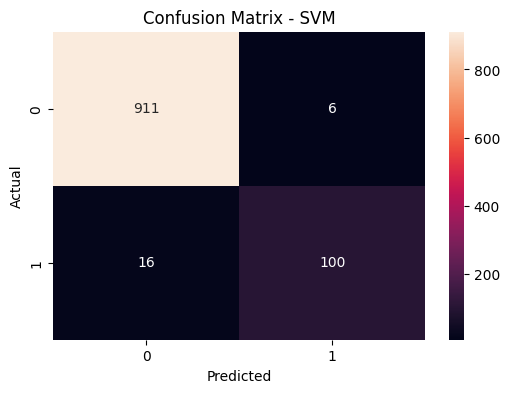

In [37]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Models Classification report

In [38]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       917
           1       0.94      0.86      0.90       116

    accuracy                           0.98      1033
   macro avg       0.96      0.93      0.94      1033
weighted avg       0.98      0.98      0.98      1033




#### Spam Prediction Function


In [ ]:


def predict_spam(message):
    """Predicts if a message is spam or not using the trained SVM model."""
    # Convert input message into a vector using the trained TF-IDF vectorizer
    message_tfidf = tfidf.transform([message])

    # Predict using the best model
    prediction = best_model.predict(message_tfidf)[0]  # Get single prediction (0 or 1)

    # Return the result
    return "Spam" if prediction == 1 else "Not Spam"

# Get user input for prediction
user_message = input("Enter a message to check if it's spam or not: ")
result = predict_spam(user_message)
print(f"\nPrediction: {result}")
